In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [46]:
# Cargamos los datos desde la URL
url = 'https://raw.githubusercontent.com/Jesus-AM/dataset/main/GCB2022v27_MtCO2_flat.csv'
data = pd.read_csv(url)

In [47]:
# Mostramos los primeros 5 registros de los datos
print(data.head())

       Country Continent ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  \
0  Afghanistan      Asia                AFG  1750    0.0   NaN  NaN  NaN   
1  Afghanistan      Asia                AFG  1751    0.0   NaN  NaN  NaN   
2  Afghanistan      Asia                AFG  1752    0.0   NaN  NaN  NaN   
3  Afghanistan      Asia                AFG  1753    0.0   NaN  NaN  NaN   
4  Afghanistan      Asia                AFG  1754    0.0   NaN  NaN  NaN   

   Cement  Flaring  Other  Per Capita  
0     NaN      NaN    NaN         NaN  
1     NaN      NaN    NaN         NaN  
2     NaN      NaN    NaN         NaN  
3     NaN      NaN    NaN         NaN  
4     NaN      NaN    NaN         NaN  


In [48]:
# Realizamos el método de estadística descriptiva de aprendizaje automático de las columnas Gas, Oil y Coal desde 1970 a 2021 agrupados por la columna "Continent"
my_ts.index = pd.to_datetime(my_ts.index)
subset_data = data[data.Year >= 1970]
subset_data = subset_data.groupby('Continent')[['Gas', 'Oil', 'Coal']].describe()
subset_data

NameError: name 'my_ts' is not defined

In [49]:
# Realizamos una comparación entre el continente "Europe" y "America" respecto al Gas y Coal desde 1970 a 2021
subset_data = data[(data.Year >= 1970) & ((data.Continent == 'Europe') | (data.Continent == 'America'))]
subset_data = subset_data.groupby(['Continent', 'Year'])[['Gas', 'Coal']].sum().reset_index()

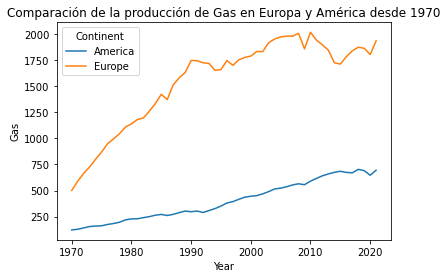

In [50]:
# Creamos una gráfica de línea para comparar la producción de Gas en Europa y América desde 1970
fig, ax = plt.subplots()
sns.lineplot(x='Year', y='Gas', hue='Continent', data=subset_data)
ax.set_title('Comparación de la producción de Gas en Europa y América desde 1970')
plt.show()

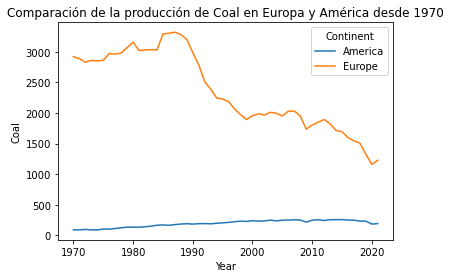

In [51]:
# Creamos una gráfica de línea para comparar la producción de Coal en Europa y América desde 1970
fig, ax = plt.subplots()
sns.lineplot(x='Year', y='Coal', hue='Continent', data=subset_data)
ax.set_title('Comparación de la producción de Coal en Europa y América desde 1970')
plt.show()

In [52]:
# Realizamos una predicción con series de tiempo de aprendizaje automático sobre el contiente "Europe" y "America" con respecto al Gas a partir de 1970
# Primero, preparamos los datos para el modelo de aprendizaje automático
subset_data = data[(data.Year >= 1970) & ((data.Continent == 'Europe') | (data.Continent == 'America'))]
subset_data = subset_data.groupby(['Continent', 'Year'])[['Gas']].sum().reset_index()

In [53]:
# Separamos los datos de Europa y América
europe_data = subset_data[subset_data.Continent == 'Europe']
america_data = subset_data[subset_data.Continent == 'America']

In [54]:
# Convertimos los datos a una serie temporal
europe_series = pd.Series(europe_data.Gas.values, index=europe_data.Year, name='Gas')
america_series = pd.Series(america_data.Gas.values, index=america_data.Year, name='Gas')
europe_series

Year
1970     500.782485
1971     589.844427
1972     664.337452
1973     726.842913
1974     800.862509
1975     868.927113
1976     948.494450
1977     995.278386
1978    1045.458651
1979    1109.481052
1980    1139.289721
1981    1181.031589
1982    1195.792326
1983    1261.319735
1984    1333.724838
1985    1422.877185
1986    1372.315504
1987    1514.343469
1988    1580.751443
1989    1631.757563
1990    1748.009817
1991    1745.763651
1992    1725.547431
1993    1719.590359
1994    1652.427194
1995    1660.207314
1996    1746.783695
1997    1700.893584
1998    1754.396408
1999    1776.680178
2000    1789.891116
2001    1833.962823
2002    1832.322201
2003    1919.391881
2004    1953.421230
2005    1973.867276
2006    1981.189328
2007    1980.675949
2008    2008.126320
2009    1858.810109
2010    2018.435810
2011    1943.232577
2012    1897.714557
2013    1845.503538
2014    1725.359768
2015    1713.249344
2016    1783.557024
2017    1839.123782
2018    1874.697581
2019    1865.04

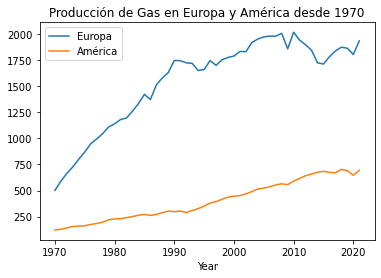

In [55]:
# Visualizamos las series temporales de Europa y América
fig, ax = plt.subplots()
europe_series.plot()
america_series.plot()
ax.set_title('Producción de Gas en Europa y América desde 1970')
ax.legend(['Europa', 'América'])
plt.show()

In [56]:
#Descomponemos las series temporales en tendencia, estacionalidad y ruido
europe_decomposition = seasonal_decompose(europe_series, model='additive', period=1)
america_decomposition = seasonal_decompose(america_series, model='additive', period=1)

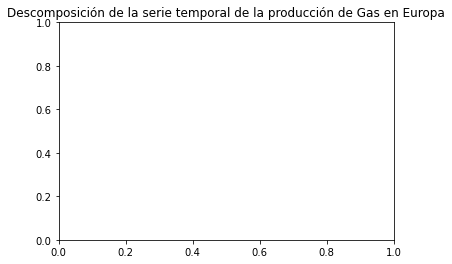

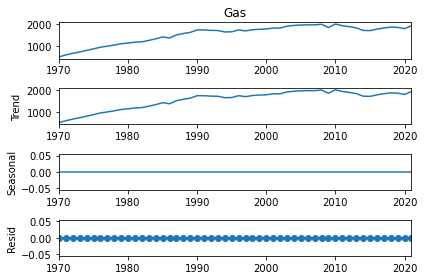

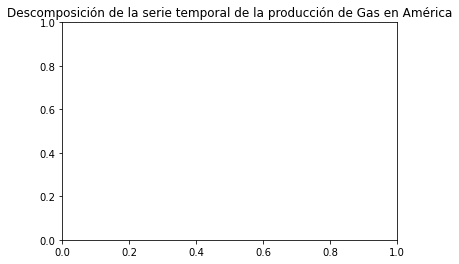

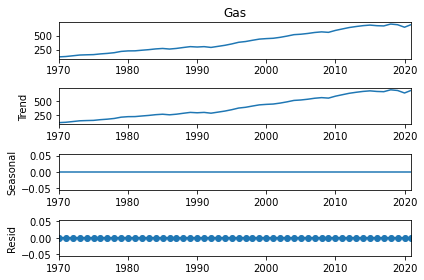

In [57]:
#Visualizamos las series descompuestas de Europa y América
fig, ax = plt.subplots()
europe_decomposition.plot()
ax.set_title('Descomposición de la serie temporal de la producción de Gas en Europa')
plt.show()

fig, ax = plt.subplots()
america_decomposition.plot()
ax.set_title('Descomposición de la serie temporal de la producción de Gas en América')
plt.show()

In [58]:
#Entrenamos el modelo ARIMA para la serie temporal de Europa

model = ARIMA(europe_series, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [392]:
#Realizamos la predicción para los próximos 10 años en Europa
europe_predictions = model_fit.forecast(steps=10)

C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [393]:
#Entrenamos el modelo ARIMA para la serie temporal de América
model = ARIMA(america_series, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [394]:
#Realizamos la predicción para los próximos 10 años en América
america_predictions = model_fit.forecast(steps=10)

C:\Users\Jesus Arenas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


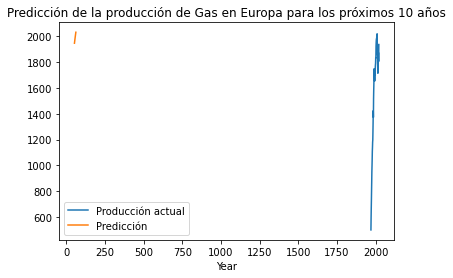

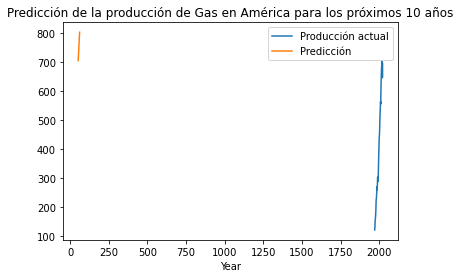

In [395]:
#Visualizamos las predicciones de Europa y América
fig, ax = plt.subplots()
europe_series.plot()
europe_predictions.plot()
ax.set_title('Predicción de la producción de Gas en Europa para los próximos 10 años')
ax.legend(['Producción actual', 'Predicción'])
plt.show()

fig, ax = plt.subplots()
america_series.plot()
america_predictions.plot()
ax.set_title('Predicción de la producción de Gas en América para los próximos 10 años')
ax.legend(['Producción actual', 'Predicción'])
plt.show()